In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


#Load dataset
data = load_iris()
X, y = data.data, data.target

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)


Accuracy: 1.0


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy:1.00


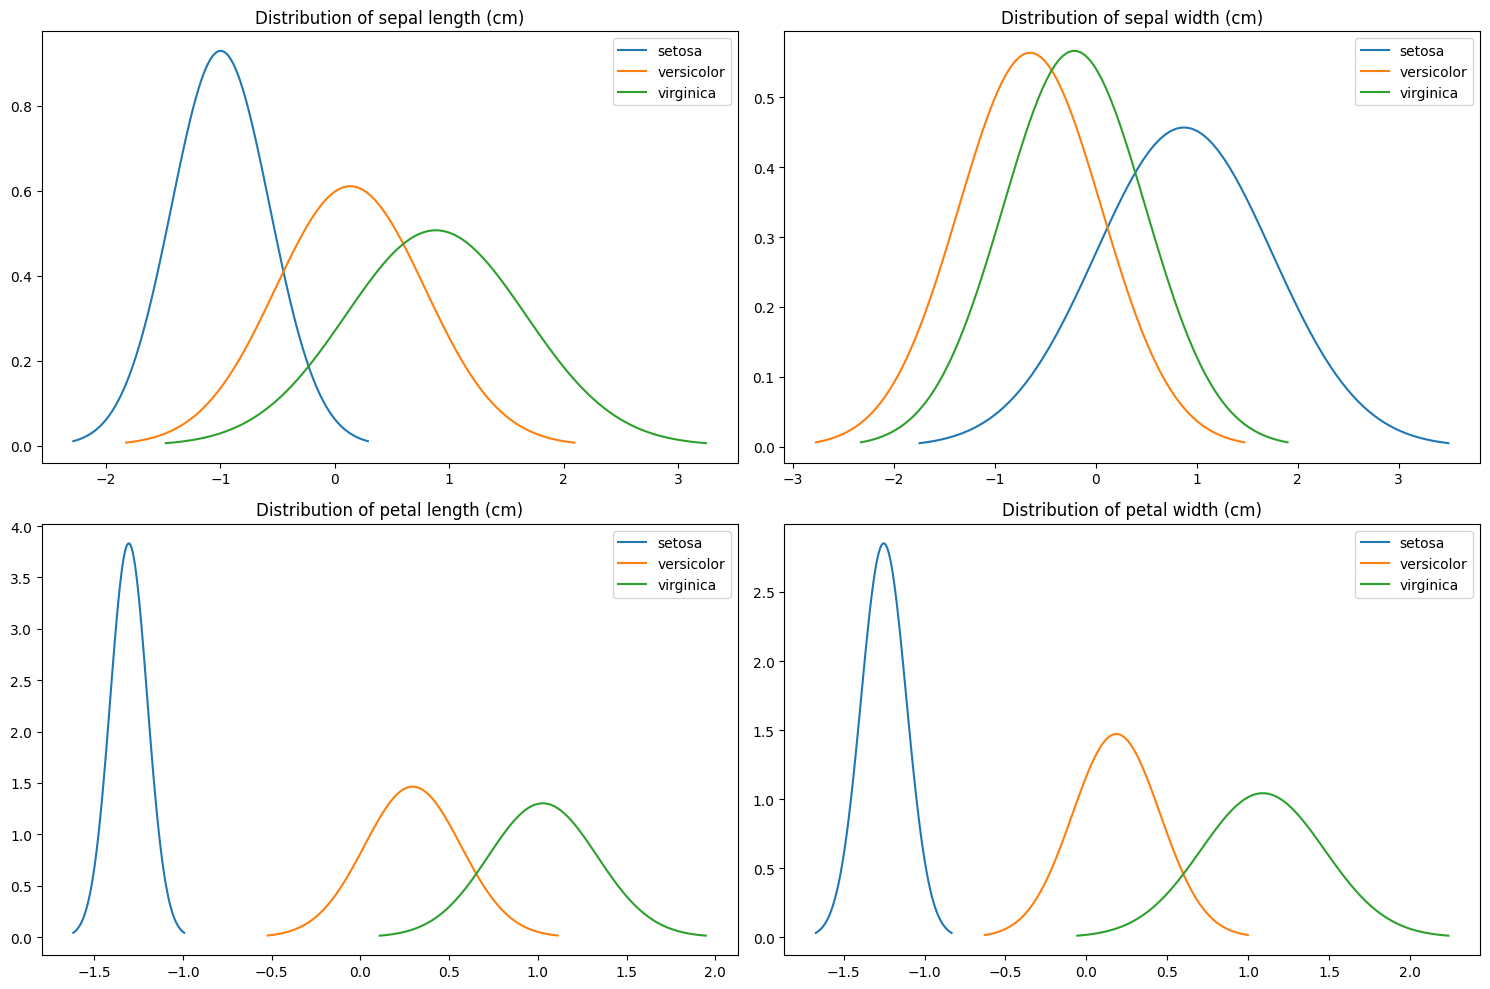

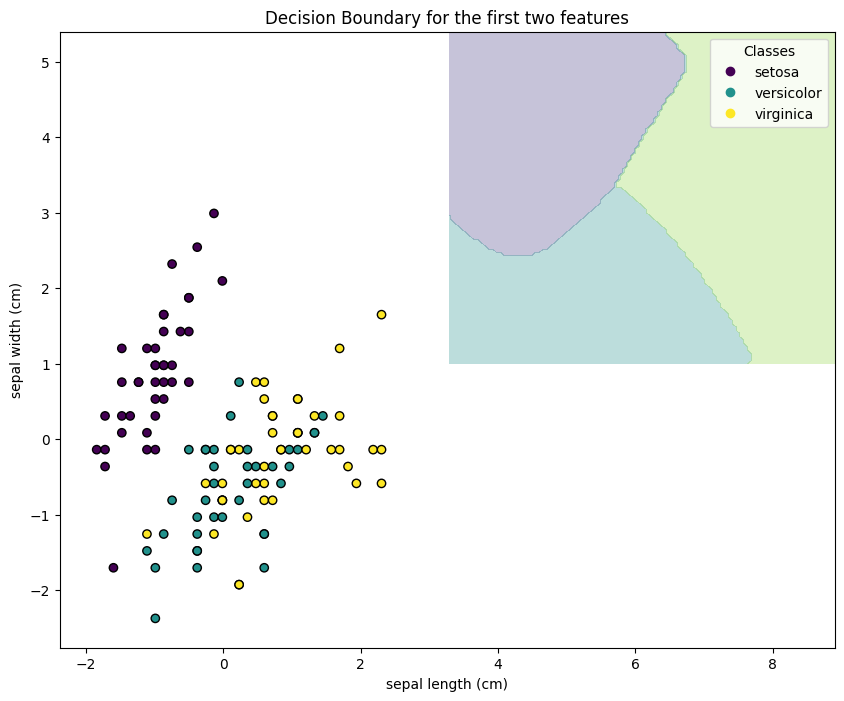

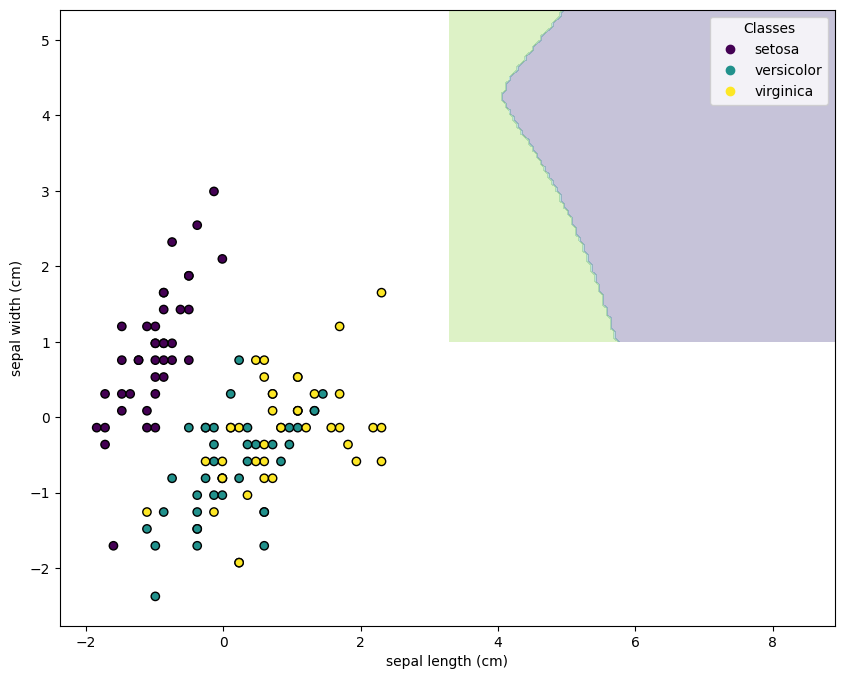

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn.metrics import accuracy_score, classification_report

class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.classes_priors = {}
        self.feature_params = {} #Stores (mean, var) for each feature per class

    def fit(self, X, y):
        self.classes = np.unique(y)

        for c in self.classes:
            X_c = X[y == c]

            #Claculate class prior p(y)
            self.classes_priors[c] = len(X_c) / len(X)

            #Calculate mean and variance for each feature
            self.feature_params[c] = {
                'mean': np.mean(X_c, axis=0),
                # Corrected: Removed the redundant X_c argument from var()
                'var': X_c.var(axis=0)
            }
    def _calculate_likelihood(self, x, mean, var):
        """Guassian probability density function"""
        #Handle zero variance (add small epsilon to avoid division by zero)
        var = np.maximum(var, 1e-9) # Corrected syntax for scientific notation
        return norm.pdf(x, loc=mean, scale=np.sqrt(var))

    def predict(self, X):
        predictions = []

        for sample in X:
          posteriors = []

          # Corrected iteration over classes
          for c in self.classes:
            #Start with the class prior P(y)
            # Corrected attribute name
            posterior = np.log(self.classes_priors[c])

            #Multiply by each feature's likelihood P(x_i|y)
            means = self.feature_params[c]['mean']
            vars = self.feature_params[c]['var']

            for i in range(len(sample)):
              likelihood = self._calculate_likelihood(sample[i], means[i], vars[i])
              posterior += np.log(likelihood + 1e-9)

            posteriors.append(posterior)

          # Select Class with the highest posterior probability
          # Corrected variable name
          predictions.append(self.classes[np.argmax(posteriors)])

        return np.array(predictions)

#Load and prepare iris dataset
iris = load_iris()
X = iris.data
y = iris.target # Use the numerical target labels for splitting
class_name = iris.target_names # Keep target_names for the report

#split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalize features (import for Guassian NB)
train_mean = np.mean(X_train, axis=0)
train_std = np.std(X_train, axis=0)
X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std

#Train the model
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)

#Make predictions
# Corrected: Use the instance of your custom GaussianNaiveBayes class (gnb)
y_pred = gnb.predict(X_test)

#Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_name))
print(f"Accuracy:{accuracy_score(y_test, y_pred):.2f}")
#Visualize feature distributions by class
plt.figure(figsize=(15, 10))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    for c in gnb.classes:
      mean = gnb.feature_params[c]['mean'][i]
      std = np.sqrt(gnb.feature_params[c]['var'][i])
      x = np.linspace(mean - 3*std, mean + 3*std, 100)
      plt.plot(x, norm.pdf(x, loc=mean, scale=std), label=f'{class_name[c]}') # Corrected class_names to class_name
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

#Visualize decision boundaries (using first two features)
def plot_decision_boundary():
  X_vis = X_train[:, :2]

  #Create grid
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  #predict on grid(using only two features)
  # Remember to normalize the grid points the same way the training data was normalized
  grid_points = np.c_[xx.ravel(), yy.ravel()]
  grid_points_normalized = (grid_points - train_mean[:2]) / train_std[:2] # Normalize only the first two features

  Z = gnb.predict(grid_points_normalized) # Predict on normalized grid points
  Z = Z.reshape(xx.shape)

  #PLOT
  plt.figure(figsize=(10, 8))
  # Corrected: Use gnb.classes instead of gnp.classes
  plt.contourf(xx, yy, Z, alpha=0.3, levels=len(gnb.classes)-1)

  #Create proper legend handles
  # Use the original X_train[:, :2] for plotting the points, as the grid is based on the original scale
  scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                        cmap='viridis', edgecolors='k')

  #Get unique classes and their names
  unique_classes = np.unique(y_train)
  legend_labels = [class_name[c] for c in unique_classes]

  #create legend properly
  plt.legend(handles=scatter.legend_elements()[0],
             labels=legend_labels,
             title='Classes')
  plt.xlabel(iris.feature_names[0])
  plt.ylabel(iris.feature_names[1])
  plt.title("Decision Boundary for the first two features") # Add a title for clarity
  plt.show() # Add show to display the plot

# Call the plot_decision_boundary function to display the plot
plot_decision_boundary()


#Visualize decision boundaries (using first two features)
def plot_decision_boundary():
  X_vis = X_train[:, :2]

  #Create grid
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  #predict on grid(using only two features)
  Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  #PLOT
  plt.figure(figsize=(10, 8))
  # Corrected: Use gnb.classes instead of gnp.classes
  plt.contourf(xx, yy, Z, alpha=0.3, levels=len(gnb.classes)-1)

  #Create proper legend handles
  scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train,
                        cmap='viridis', edgecolors='k')
  #Get unique classes and their names
  unique_classes = np.unique(y_train)
  legend_labels = [class_name[c] for c in unique_classes]

  #create legend properly
  plt.legend(handles=scatter.legend_elements()[0],
             labels=legend_labels,
             title='Classes')
  plt.xlabel(iris.feature_names[0])
  plt.ylabel(iris.feature_names[1])

  plt.show() # Add show to display the plot

# Call the plot_decision_boundary function to display the plot
plot_decision_boundary()